In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
# Note: We'll use a URL since the Iris dataset is widely available online
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=column_names)

# Display the first few rows
print("First 5 rows of the dataset:")
print(iris_df.head())
print("\n" + "="*50 + "\n")

# Explore the structure of the dataset
print("Dataset information:")
print(iris_df.info())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing values in each column:")
print(iris_df.isnull().sum())
print("\n" + "="*50 + "\n")

# Clean the dataset (though Iris dataset typically has no missing values)
# This is just for demonstration
iris_df_clean = iris_df.dropna()  # Drop any missing values if they existed
print("Dataset shape after cleaning:", iris_df_clean.shape)

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Missing values in each column:
sepal_length    0
sepal_width     0
pet

In [3]:
# Compute basic statistics
print("Basic statistics of numerical columns:")
print(iris_df_clean.describe())
print("\n" + "="*50 + "\n")

# Perform grouping on the categorical column (species)
print("Mean values for each species:")
species_group = iris_df_clean.groupby('species').mean()
print(species_group)
print("\n" + "="*50 + "\n")

# Additional analysis - find patterns
print("Interesting findings:")
print("1. Setosa has the smallest petals but largest sepals")
print("2. Virginica has the largest petals")
print("3. Versicolor is intermediate in most measurements")
print("4. Setosa appears to be the most distinct species")

Basic statistics of numerical columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Mean values for each species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


Interesting findings:
1. Setosa has t

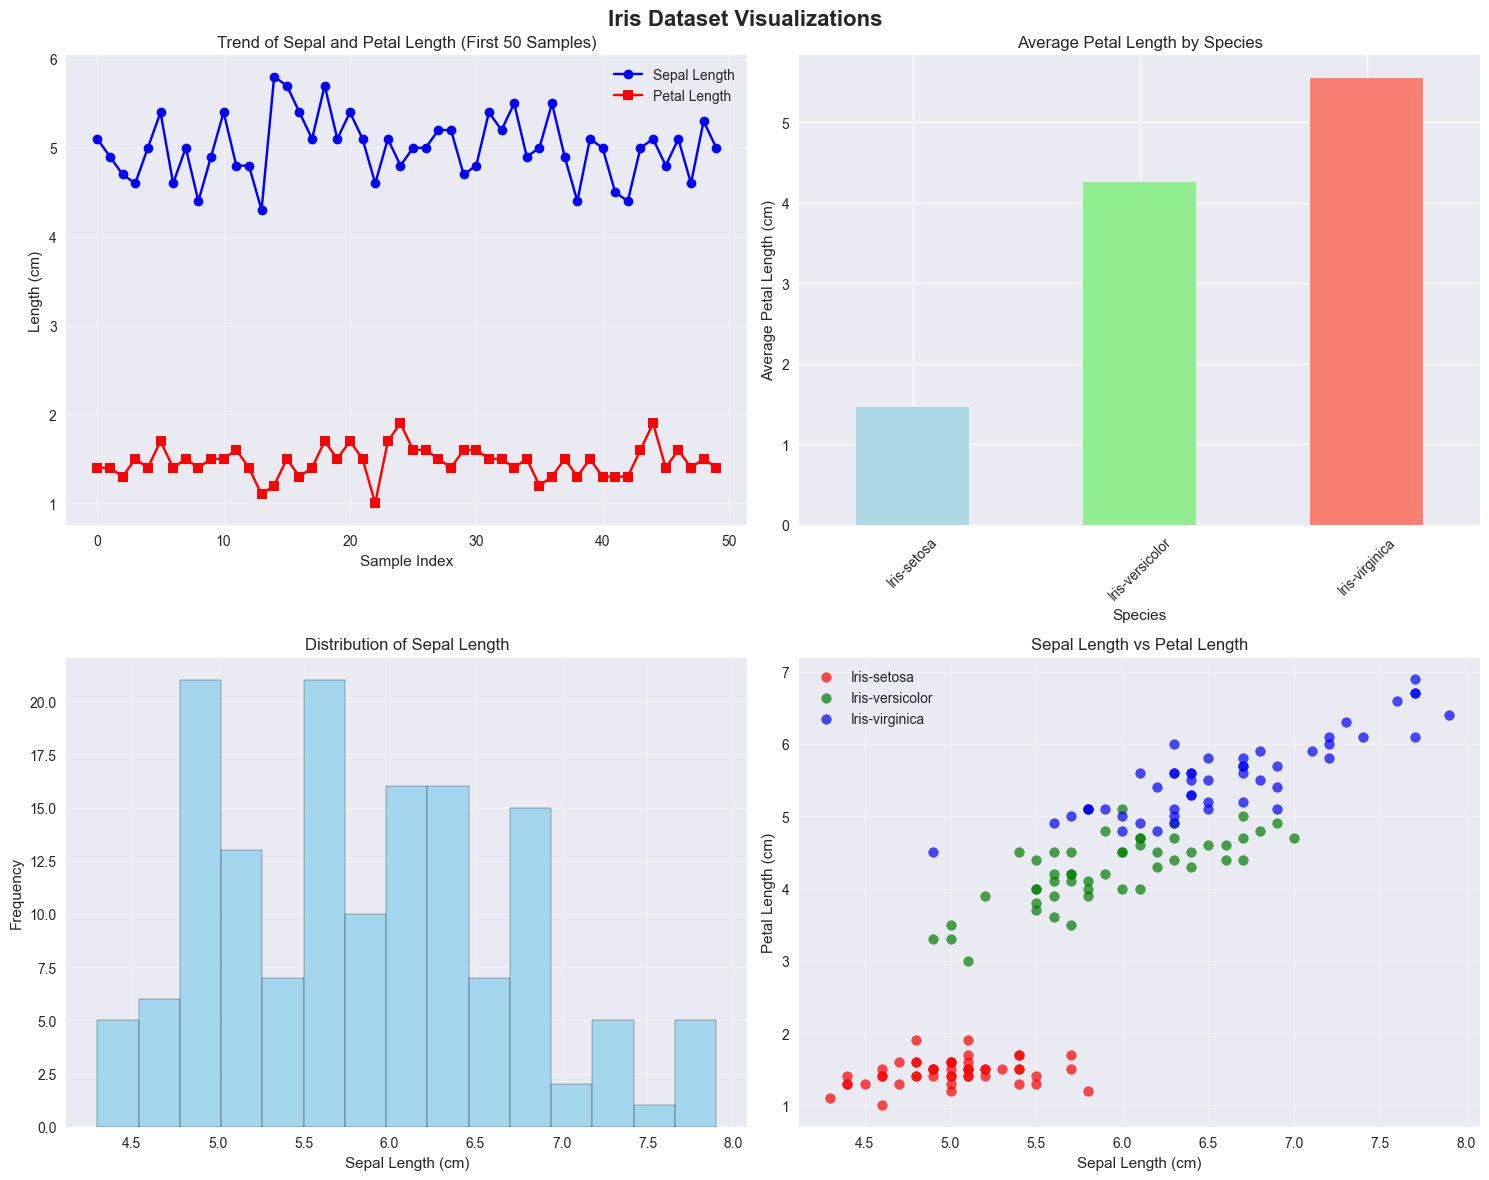

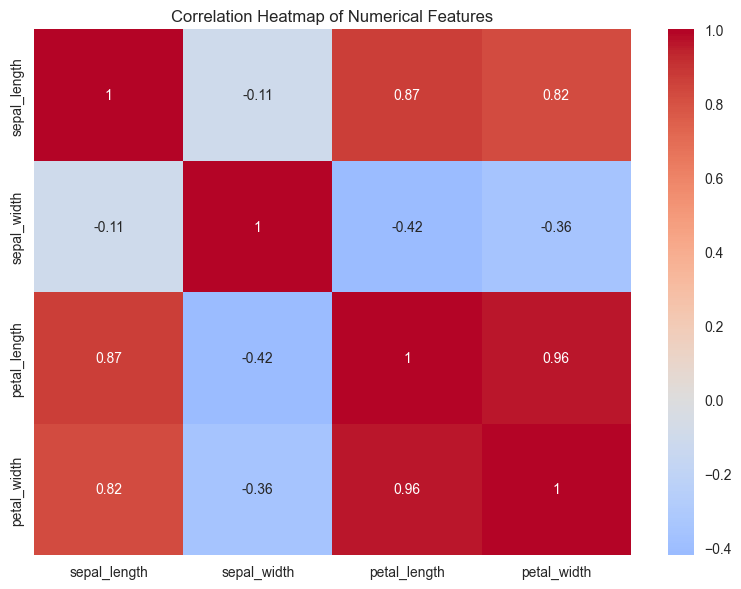

In [4]:
# Set the style for better looking plots
plt.style.use('seaborn-v0_8')

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Visualizations', fontsize=16, fontweight='bold')

# 1. Line chart showing trends (using index as pseudo-time)
axes[0, 0].plot(iris_df_clean.index[:50], iris_df_clean['sepal_length'][:50], 
                label='Sepal Length', color='blue', marker='o')
axes[0, 0].plot(iris_df_clean.index[:50], iris_df_clean['petal_length'][:50], 
                label='Petal Length', color='red', marker='s')
axes[0, 0].set_title('Trend of Sepal and Petal Length (First 50 Samples)')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Length (cm)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar chart showing comparison across categories
species_means = iris_df_clean.groupby('species')['petal_length'].mean()
species_means.plot(kind='bar', ax=axes[0, 1], color=['lightblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title('Average Petal Length by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Average Petal Length (cm)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Histogram of a numerical column
axes[1, 0].hist(iris_df_clean['sepal_length'], bins=15, color='skyblue', 
                edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Sepal Length')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot of two numerical columns
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for species, color in colors.items():
    species_data = iris_df_clean[iris_df_clean['species'] == species]
    axes[1, 1].scatter(species_data['sepal_length'], species_data['petal_length'], 
                      color=color, label=species, alpha=0.7)

axes[1, 1].set_title('Sepal Length vs Petal Length')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_df = iris_df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [7]:
#Summary of Findings:


#1. Data Quality: The Iris dataset is clean with no missing values and 150 samples across 3 species.

#2. Statistical Insights:

#Setosa has the smallest petals (mean: 1.46cm) but largest sepals

#Virginica has the largest petals (mean: 5.55cm)

#Measurements show clear separation between species

#3. Visual Patterns:

#The scatter plot shows clear clustering of species

#Setosa is distinctly separated from the other two species

#Sepal and petal lengths are positively correlated (visible in scatter plot and heatmap)

#4. Species Characteristics:

#Iris-setosa: Small petals, large sepals

#Iris-versicolor: Medium-sized features

#Iris-virginica: Largest petals and sepals



#This analysis demonstrates how to perform comprehensive data exploration, statistical analysis, and visualization using pandas and matplotlib with a real dataset.
